# Veri Yükleme

In [1]:
import tensorflow as tf
import torch 
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

base_dir=r"C:\Users\mkadi\Desktop\Bitirme\X-ray\X-ray"
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.01)
test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.3)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=16)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=16)

Found 15003 images belonging to 3 classes.
Found 4544 images belonging to 3 classes.


In [2]:
train_datagen

# 5 Tane Rastgele Görsel

(16, 500, 500, 3)
[1. 0. 0.]


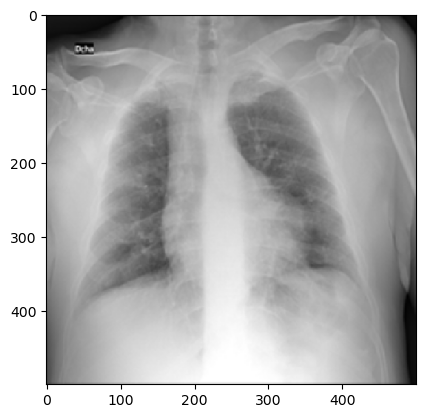

(16, 500, 500, 3)
[0. 1. 0.]


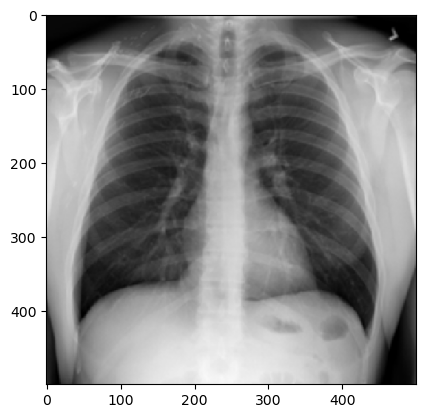

(16, 500, 500, 3)
[0. 0. 1.]


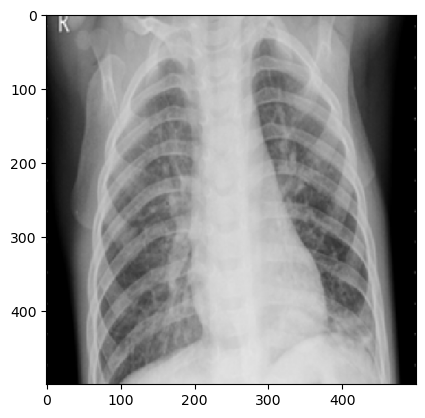

(16, 500, 500, 3)
[0. 1. 0.]


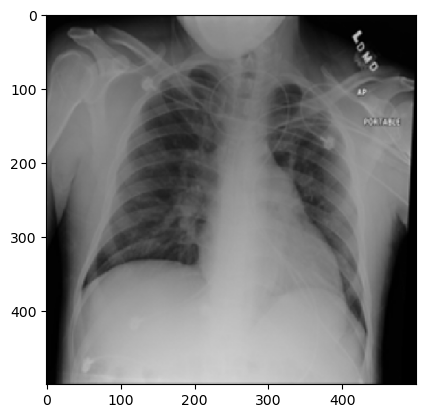

(16, 500, 500, 3)
[1. 0. 0.]


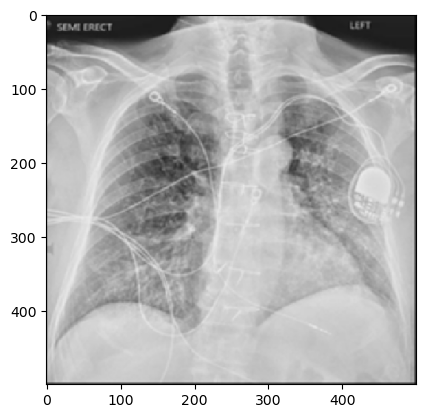

In [3]:
import matplotlib.pyplot as plt
for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

# Kütüphaneler

In [4]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations



# Model Oluşumu

In [5]:
model = Sequential()

model.add(layers.Conv2D(filters=8,activation="relu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())


model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 244, 16)      3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 32)       0

# Model Eğitimi

In [7]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()



In [8]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
result=model.fit(train_datagen,epochs=10,verbose=1,validation_data=test_datagen)

Epoch 1/10
938/938 [==============================] - 105s 109ms/step - loss: 0.3908 - mse: 0.0718 - accuracy: 0.8474 - val_loss: 0.1820 - val_mse: 0.0343 - val_accuracy: 0.9333
Epoch 2/10
938/938 [==============================] - 102s 108ms/step - loss: 0.1523 - mse: 0.0281 - accuracy: 0.9451 - val_loss: 0.0958 - val_mse: 0.0163 - val_accuracy: 0.9696
Epoch 3/10
938/938 [==============================] - 98s 105ms/step - loss: 0.0700 - mse: 0.0126 - accuracy: 0.9753 - val_loss: 0.0448 - val_mse: 0.0066 - val_accuracy: 0.9879
Epoch 4/10
938/938 [==============================] - 96s 102ms/step - loss: 0.0460 - mse: 0.0081 - accuracy: 0.9851 - val_loss: 0.0380 - val_mse: 0.0051 - val_accuracy: 0.9901
Epoch 5/10
938/938 [==============================] - 98s 104ms/step - loss: 0.0275 - mse: 0.0047 - accuracy: 0.9912 - val_loss: 0.0209 - val_mse: 0.0022 - val_accuracy: 0.9960
Epoch 6/10
938/938 [==============================] - 95s 101ms/step - loss: 0.0176 - mse: 0.0028 - accuracy: 0.9

# Model Testi

In [11]:
#model.evaluate(test_datagen)

{'Covid': 0, 'Normal': 1, 'Viral': 2}
1/1 [==============================] - 0s 56ms/step
Olasılık= [6.51417275e-25 1.00000000e+00 1.24812174e-11]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


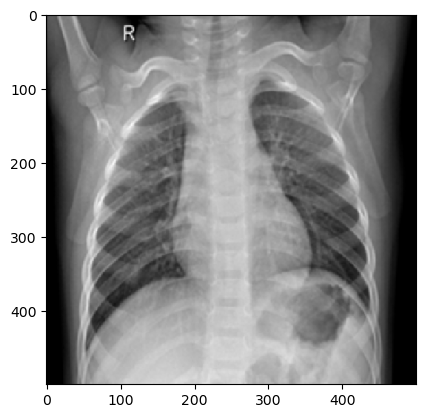

1/1 [==============================] - 0s 32ms/step
Olasılık= [4.391217e-23 1.000000e+00 6.451622e-20]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


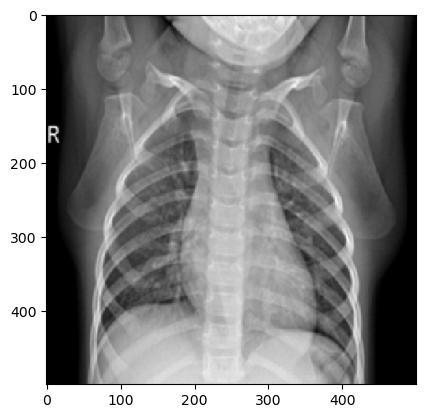

1/1 [==============================] - 0s 34ms/step
Olasılık= [1.2114345e-18 1.0000000e+00 8.0728020e-12]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


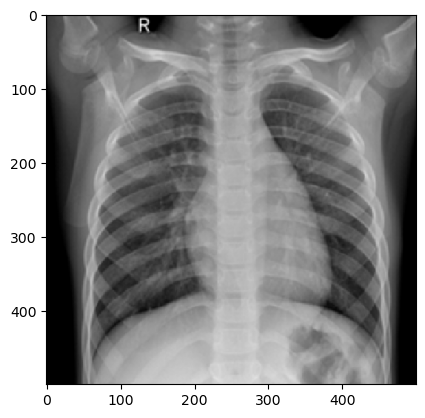

1/1 [==============================] - 0s 35ms/step
Olasılık= [9.6516098e-14 1.0000000e+00 6.2540615e-26]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


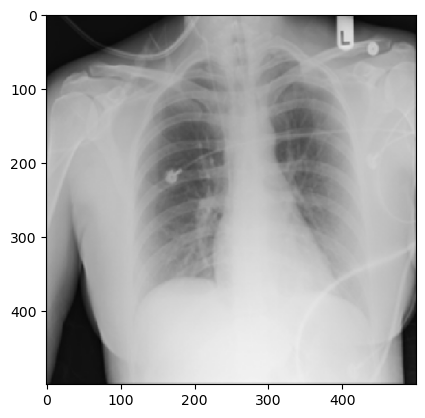

1/1 [==============================] - 0s 35ms/step
Olasılık= [5.2823124e-11 1.0000000e+00 1.2008528e-17]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


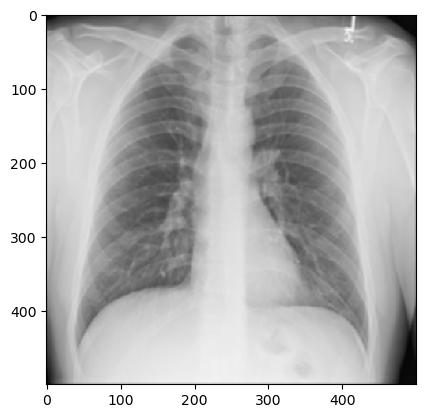

1/1 [==============================] - 0s 34ms/step
Olasılık= [4.637914e-13 1.000000e+00 1.787740e-29]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


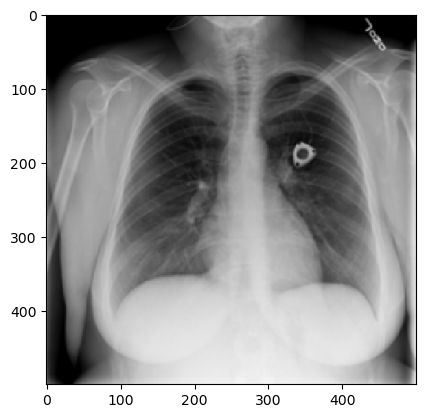

1/1 [==============================] - 0s 34ms/step
Olasılık= [8.1902024e-17 1.0000000e+00 7.2293984e-25]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


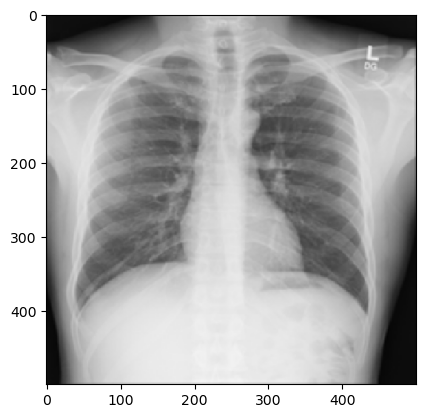

1/1 [==============================] - 0s 40ms/step
Olasılık= [5.398818e-15 1.000000e+00 5.741314e-08]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


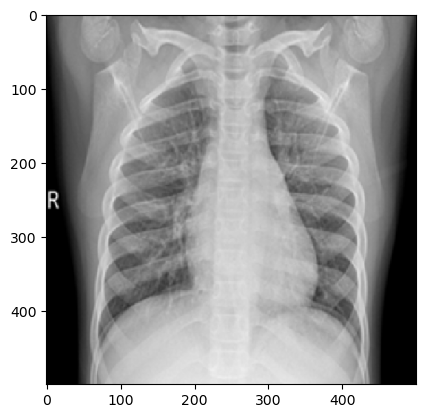

1/1 [==============================] - 0s 38ms/step
Olasılık= [2.7175978e-11 1.0691488e-10 1.0000000e+00]
Gerçek Sonuc= [0. 0. 1.]
Modelin Sonucu= Viral


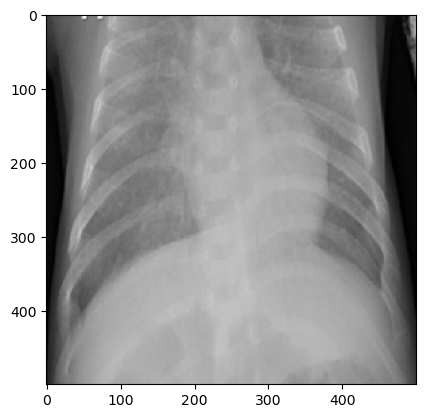

1/1 [==============================] - 0s 36ms/step
Olasılık= [1.4232123e-08 1.0000000e+00 4.7908971e-10]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


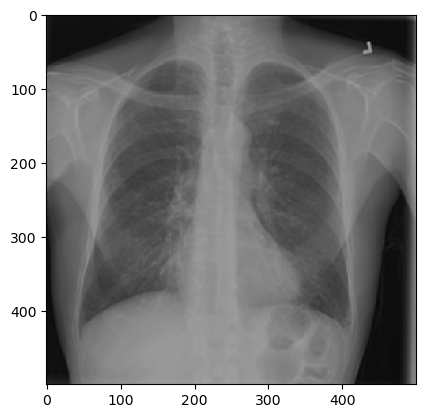

1/1 [==============================] - 0s 38ms/step
Olasılık= [4.4356557e-19 5.7420028e-12 1.0000000e+00]
Gerçek Sonuc= [0. 0. 1.]
Modelin Sonucu= Viral


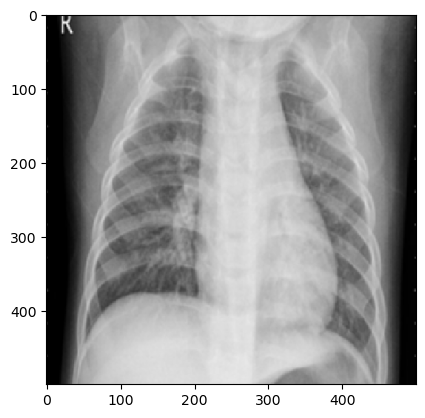

1/1 [==============================] - 0s 38ms/step
Olasılık= [2.5693616e-01 7.4305654e-01 7.3241004e-06]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


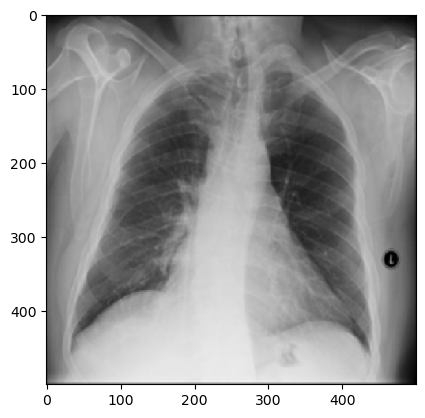

1/1 [==============================] - 0s 33ms/step
Olasılık= [4.0169209e-20 1.0977292e-13 1.0000000e+00]
Gerçek Sonuc= [0. 0. 1.]
Modelin Sonucu= Viral


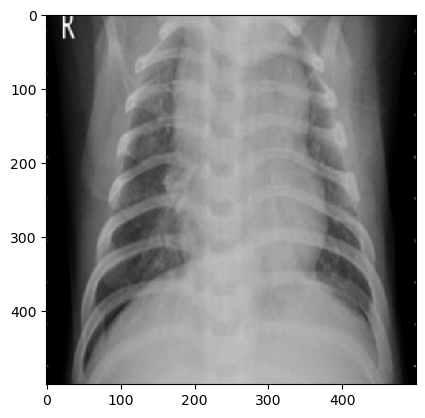

1/1 [==============================] - 0s 38ms/step
Olasılık= [2.8784009e-15 9.9999535e-01 4.6874843e-06]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


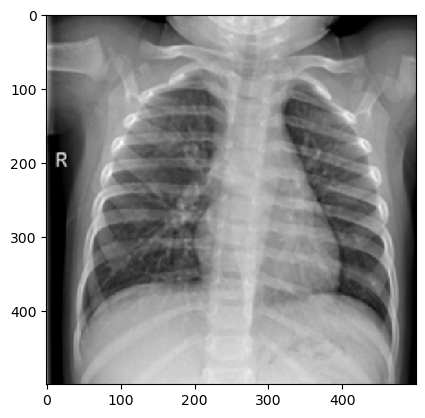

1/1 [==============================] - 0s 38ms/step
Olasılık= [4.3748539e-13 1.0000000e+00 2.0443325e-25]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


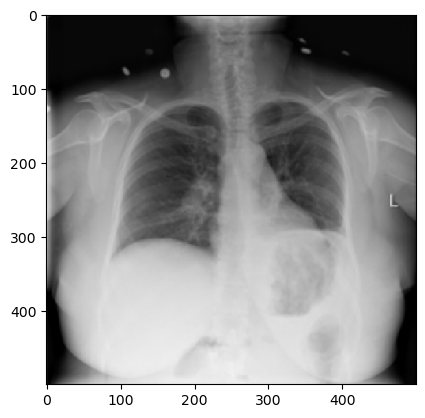

1/1 [==============================] - 0s 35ms/step
Olasılık= [2.0906879e-12 1.0000000e+00 1.1659972e-21]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


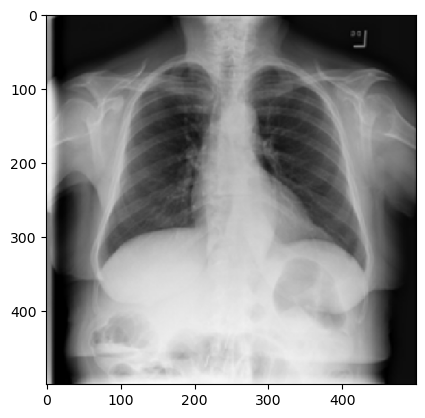

1/1 [==============================] - 0s 36ms/step
Olasılık= [9.1689953e-23 3.7636423e-09 1.0000000e+00]
Gerçek Sonuc= [0. 0. 1.]
Modelin Sonucu= Viral


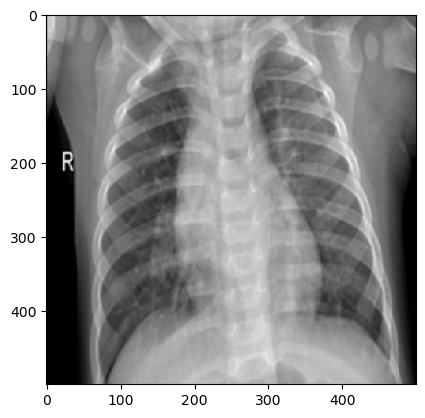

1/1 [==============================] - 0s 36ms/step
Olasılık= [1.3315364e-06 9.9999869e-01 1.1075476e-16]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


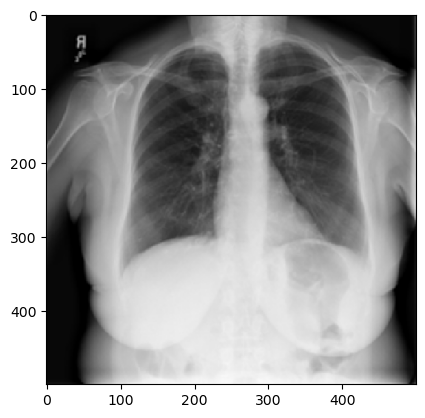

1/1 [==============================] - 0s 32ms/step
Olasılık= [1.3113791e-24 1.0000000e+00 4.1156092e-16]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


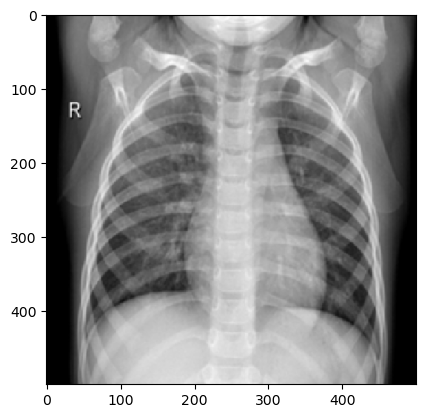

1/1 [==============================] - 0s 33ms/step
Olasılık= [1.3200781e-15 1.0000000e+00 7.4722674e-18]
Gerçek Sonuc= [0. 1. 0.]
Modelin Sonucu= normal


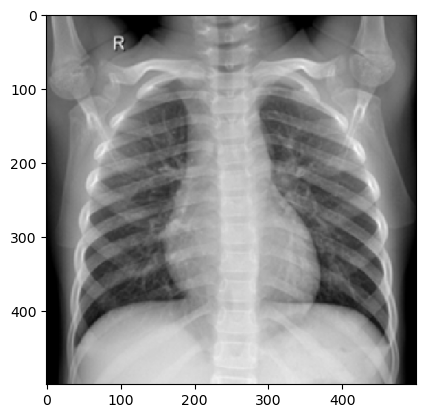

In [27]:
print(test_datagen.class_indices)
for _ in range(20):
    img,label=test_datagen.next()
    a=model.predict(img)
    print("Olasılık=",a[0])
    np.argmax(a[0])
    plt.imshow(img[0])
    print("Gerçek Sonuc=",label[0])
    if np.argmax(a[0])==0:
        print("Modelin Sonucu=","Covid")
    if np.argmax(a[0])==1:
        print("Modelin Sonucu=","normal")
    if np.argmax(a[0])==2:
        
        print("Modelin Sonucu=","Viral")
        
    plt.show()

In [25]:
from PIL import Image
from skimage import transform

In [14]:
image=Image.open(r"C:\Users\mkadi\Desktop\Bitirme\test\COVID19\COVID19(475).jpg")

def tek_resim(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image,(500,500,3))
    image=np.expand_dims(image,axis=0)
    print(test_datagen.class_indices)
    return image

image=tek_resim(r"C:\Users\mkadi\Desktop\Bitirme\test\COVID19\COVID19(475).jpg")
pred=model.predict(image)
print(pred)
np.argmax(pred)
    

{'Covid': 0, 'Normal': 1, 'Viral': 2}
1/1 [==============================] - 0s 323ms/step
[[1.000000e+00 8.581348e-12 8.057823e-22]]


0

# Grafik Görselleri Oluşturma

In [15]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]


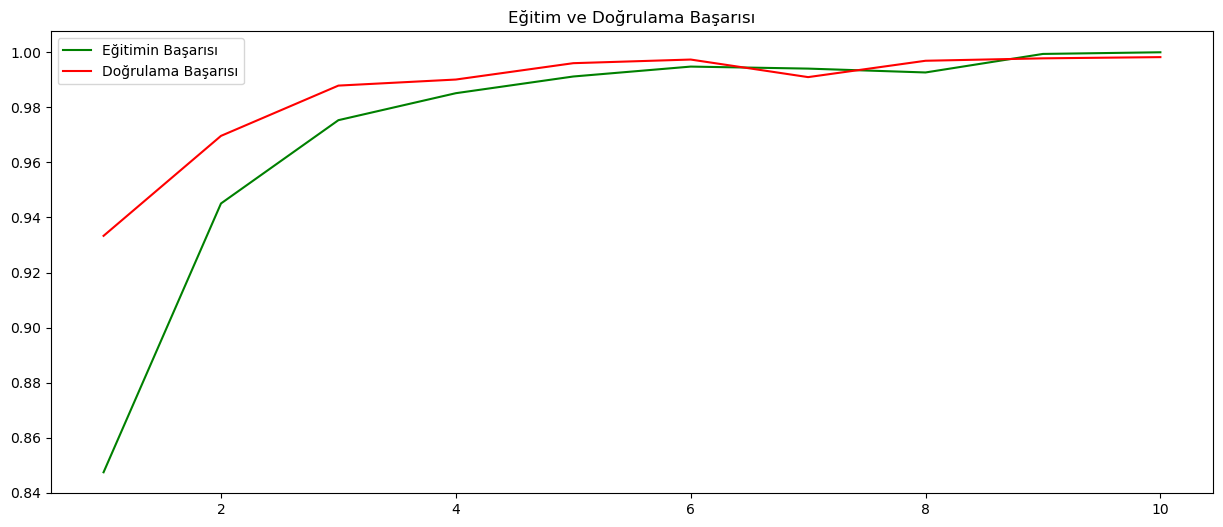

In [16]:
epoch=range(1,len(acc)+1)
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("Eğitimin Başarısı"),color="g")
plt.plot(epoch,val_acc,label=("Doğrulama Başarısı"),color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()


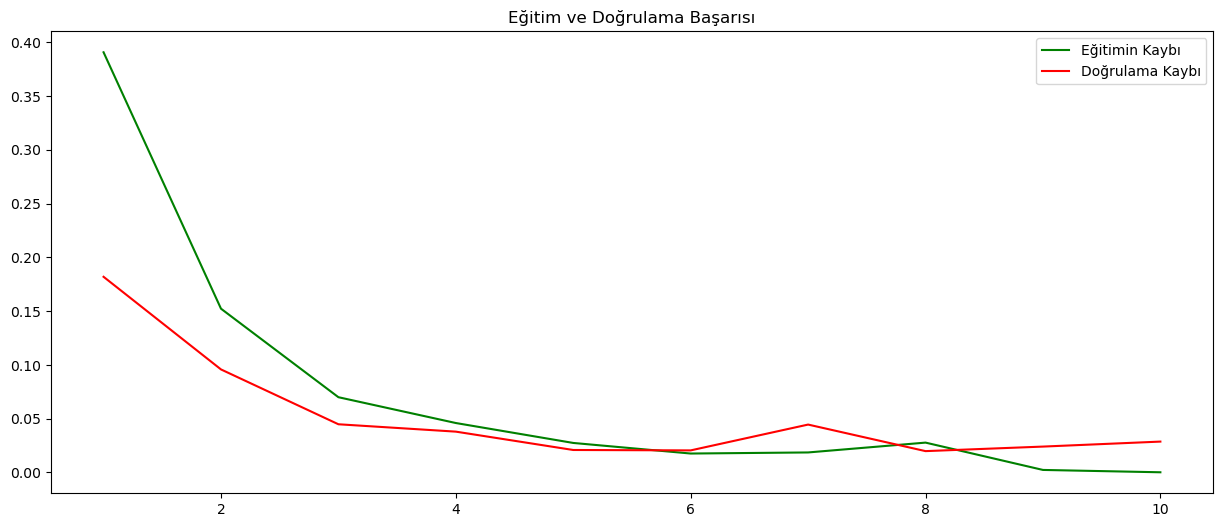

In [17]:
epoch=range(1,len(acc)+1)
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("Eğitimin Kaybı"),color="g")
plt.plot(epoch,val_loss,label=("Doğrulama Kaybı"),color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

In [28]:
model.save("doksan-oran.h5")

In [19]:
#model.save("flask-herokuV3.h5")

In [20]:
#import gradio as gr
#import requests

In [21]:
#class_names={"Covid","Normal","Viral"}

In [22]:
#def web_test(img):
  #  img1=img.reshape((-1, 500, 500, 3))
  #  tahmin=model.predict(img1).flatten()
  #  return {class_names[i]: float(tahmin[i]) for i in range(3)}

In [23]:
#image=gr.inputs.Image(shape=(500,500))
#label=gr.outputs.Label(num_top_classes=3)

#gr.Interface(fn=web_test, inputs=image, outputs=label, capture_session=True).launch(debug='True')